# Clusterizacao

In [35]:
# Montar alcenamiento
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/ColabStorage/MoviesDataset'

# Change dir
import os
os.chdir(root_path)

Mounted at /content/gdrive


In [36]:
# Importar librerias
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats

In [63]:
#Juntar actores, directores, generos en una columna
title_basics = "title.basics2022.tsv"
tb_columns = ['tconst', 'primaryTitle', 'genres']
#convert_dict = {'tconst': str, 'titleType': str, 'primaryTitle': str, 'originalTitle': str, 'startYear': int, 'runtimeMinutes': int, 'genres': object}

tb_df = pd.read_csv(title_basics,sep='\t',header=0,usecols=tb_columns)#,dtype=convert_dict)
tb_df = tb_df.dropna()

tb_df.head()

,tconst,primaryTitle,genres
0,tt0013274,Istoriya grazhdanskoy voyny,Documentary
1,tt0035423,Kate & Leopold,"Comedy,Fantasy,Romance"
2,tt0062336,The Tango of the Widower and Its Distorting Mi...,Drama
3,tt0067683,Workers '71: Nothing About Us Without Us,Documentary
4,tt0069049,The Other Side of the Wind,Drama


In [64]:
title_crew = "title.crew2022.tsv"
tc_columns = ['tconst', 'directors', 'writers']
tc_df = pd.read_csv(title_crew,sep='\t',header=0,usecols=tc_columns)
tc_df.dropna(how='any', inplace=True)

tc_df = tc_df.merge(tb_df, how="inner", on="tconst")


tc_df.head()

,tconst,directors,writers,primaryTitle,genres
0,tt10209920,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi
1,tt10229260,nm6689633,nm6689633,Tales from Las Cruces,"Action,Horror,Thriller"
2,tt10284138,nm1802756,"nm1802756,nm1471503",The Red Prince,Biography
3,tt10347850,nm3268570,nm10157662,The Island of Wonder and Despair,"Mystery,Sci-Fi,Thriller"
4,tt10447604,nm8487586,nm8487586,Fear Blood and Gold,Western


In [66]:
title_principals = "title.principals2022.tsv"
tp_columns = ['tconst', 'nconst']

tp_df = pd.read_csv(title_principals,sep='\t',header=0,usecols=tp_columns)
tp_df.dropna(how='any', inplace=True)
tp_df = tp_df.merge(tc_df, how="inner", on=["tconst"])
tp_df.head()


,tconst,nconst,directors,writers,primaryTitle,genres
0,tt10209920,nm0357405,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi
1,tt10209920,nm1778060,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi
2,tt10209920,nm0245223,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi
3,tt10209920,nm3704936,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi
4,tt10209920,nm3550868,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi


In [108]:
df = tp_df
cols = ['directors', 'writers', 'nconst', 'genres']
df['combined'] = df[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df.head()

,tconst,nconst,directors,writers,primaryTitle,genres,combined
0,tt10209920,nm0357405,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"nm3550868,nm3550868,nm0357405,Sci-Fi"
1,tt10209920,nm1778060,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"nm3550868,nm3550868,nm1778060,Sci-Fi"
2,tt10209920,nm0245223,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"nm3550868,nm3550868,nm0245223,Sci-Fi"
3,tt10209920,nm3704936,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"nm3550868,nm3550868,nm3704936,Sci-Fi"
4,tt10209920,nm3550868,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"nm3550868,nm3550868,nm3550868,Sci-Fi"


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined'])

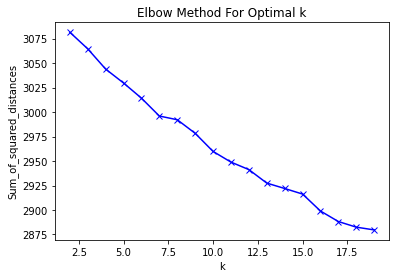

In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 15
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=400, n_init=10)
model.fit(X)
labels=model.labels_
#wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
#print(wiki_cl.sort_values(by=['cluster']))

In [75]:
name_basics = "name.basics.tsv.gz"
nb_columns = ['nconst', 'primaryName']

nb_df = pd.read_csv(name_basics,sep='\t',header=0,usecols=nb_columns)
nb_df.dropna()
nb_df.head()

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman


In [102]:
array = df["genres"].str.split(",").explode().unique() 
array
minidf = pd.DataFrame(['Sci-Fi', 'Action', 'Horror', 'Thriller', 'Biography', 'Mystery',
       'Western', 'Romance', 'Drama', 'Documentary', 'Comedy', 'Sport',
       'Fantasy', 'Crime', 'Animation', 'Adventure', 'History', 'Music',
       'Family', 'Reality-TV', 'Musical', 'War'],columns=["nconst"])

minidf["primaryName"]=minidf["nconst"]
minidf.head()

,nconst,primaryName
0,Sci-Fi,Sci-Fi
1,Action,Action
2,Horror,Horror
3,Thriller,Thriller
4,Biography,Biography


In [104]:
nb_df = pd.concat([nb_df,minidf])
nb_df.head()

,nconst,primaryName
17,Music,Music
18,Family,Family
19,Reality-TV,Reality-TV
20,Musical,Musical
21,War,War


In [105]:
map_dict = dict(zip(nb_df.nconst,nb_df.primaryName))

In [109]:
df['combined'] = df['combined'].str.split(',')
df['combined'] =  df['combined'].explode().map(map_dict).groupby(level=0).agg(list)

df.head()

,tconst,nconst,directors,writers,primaryTitle,genres,combined
0,tt10209920,nm0357405,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"[Jeffrey Schneider, Jeffrey Schneider, Donna H..."
1,tt10209920,nm1778060,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"[Jeffrey Schneider, Jeffrey Schneider, Luc Ber..."
2,tt10209920,nm0245223,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"[Jeffrey Schneider, Jeffrey Schneider, Dawn Du..."
3,tt10209920,nm3704936,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"[Jeffrey Schneider, Jeffrey Schneider, Frederi..."
4,tt10209920,nm3550868,nm3550868,nm3550868,Alien Wars: Judgement Day,Sci-Fi,"[Jeffrey Schneider, Jeffrey Schneider, Jeffrey..."


Cluster: 0
Titles
Series([], )


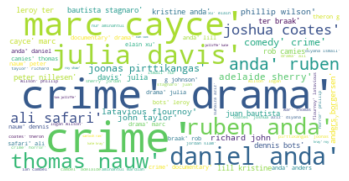

Cluster: 1
Titles
Series([], )


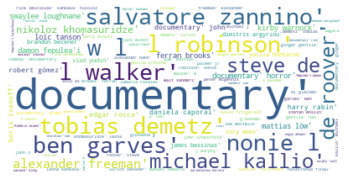

Cluster: 2
Titles
Series([], )


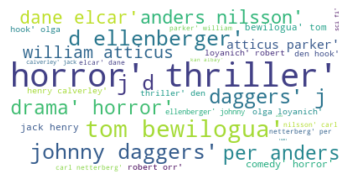

Cluster: 3
Titles
Series([], )


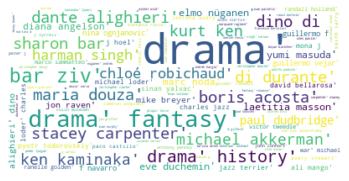

Cluster: 4
Titles
Series([], )


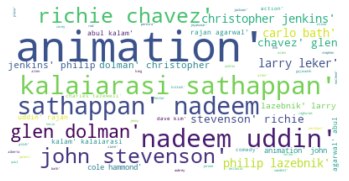

Cluster: 5
Titles
               Data Science
    Artificial intelligence
      European Central Bank
                       Bank
       Financial technology
International Monetary Fund
                 Basketball
                   Swimming


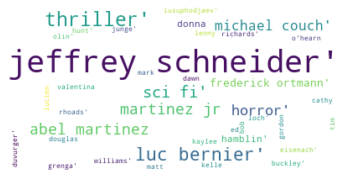

Cluster: 6
Titles
Series([], )


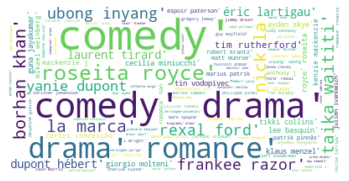

Cluster: 7
Titles
Series([], )


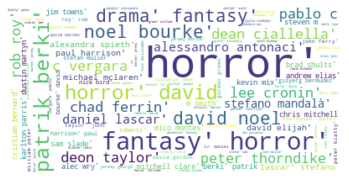

Cluster: 8
Titles
Series([], )


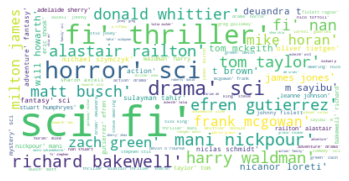

Cluster: 9
Titles
Series([], )


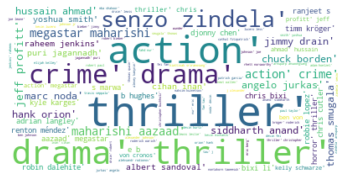

Cluster: 10
Titles
Series([], )


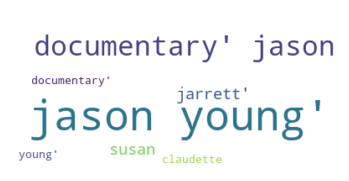

Cluster: 11
Titles
Series([], )


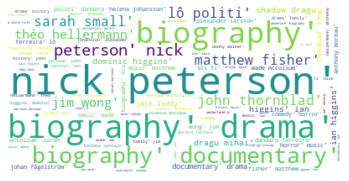

Cluster: 12
Titles
Series([], )


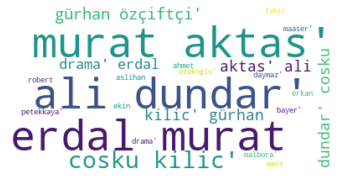

Cluster: 13
Titles
Series([], )


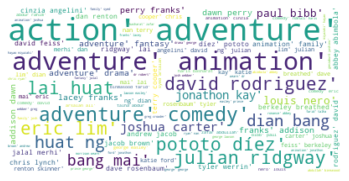

Cluster: 14
Titles
Series([], )


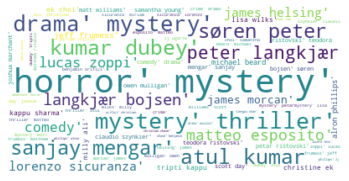

In [110]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':df["combined"]}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].astype(str).str.cat(sep=' ')
  #reemplazar o nome do actor, editor ou ator

   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()
